# Basic Statistics


In [51]:
#General imports
from sklearn import datasets
from sklearn import metrics
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

### Part 1. Basic Stats
	
    Methods available include: 
		.min() - Compute minimum value
		.max() - Compute maximum value
		.mean() - Compute mean value
		.median() - Compute median value
        .mode() - Compute mode value(s)
		.count() - Count the number of observations

#### Read in the examples

In [2]:
array1= {'exampleA' : [18, 24, 17, 21, 24, 16, 29, 18], 'exampleB' : [75, 87, 49, 68, 75, 84, 98, 92], 'exampleC' : [55, 47, 38, 66, 56, 64, 44, 39] }
new_df = pd.DataFrame(array1)
print new_df


   exampleA  exampleB  exampleC
0        18        75        55
1        24        87        47
2        17        49        38
3        21        68        66
4        24        75        56
5        16        84        64
6        29        98        44
7        18        92        39


#### Instructor example: Calculate the mean for each column

In [3]:
new_df[["exampleA","exampleB", "exampleC"]].mean()

exampleA    20.875
exampleB    78.500
exampleC    51.125
dtype: float64

#### Students: Calculate median, mode, max, min for example

Note: All answers should match your hand calculations

In [4]:
#median
new_df[["exampleA","exampleB", "exampleC"]].median() 

exampleA    19.5
exampleB    79.5
exampleC    51.0
dtype: float64

In [5]:
#mode
new_df[["exampleA", "exampleB", "exampleC"]].mode()

,exampleA,exampleB,exampleC
0,18,75.0,NaN
1,24,NaN,NaN


In [6]:
#max
new_df[["exampleA","exampleB","exampleC"]].max()

exampleA    29
exampleB    98
exampleC    66
dtype: int64

In [7]:
#min
new_df[["exampleA","exampleB","exampleC"]].min()

exampleA    16
exampleB    49
exampleC    38
dtype: int64

### Part 2. Box Plot

#### Instructor: Interquartile range 

In [8]:
print "50% Quartile:"
print new_df.quantile(.50) 
print "Median (red line of the box)"
print new_df.median()

50% Quartile:
exampleA    19.5
exampleB    79.5
exampleC    51.0
Name: 0.5, dtype: float64
Median (red line of the box)
exampleA    19.5
exampleB    79.5
exampleC    51.0
dtype: float64


In [9]:
print"25% (bottom of the box)"
print new_df.quantile(0.25)
print"75% (top of the box)"
print new_df.quantile(0.75)

25% (bottom of the box)
exampleA    17.75
exampleB    73.25
exampleC    42.75
Name: 0.25, dtype: float64
75% (top of the box)
exampleA    24.00
exampleB    88.25
exampleC    58.00
Name: 0.75, dtype: float64


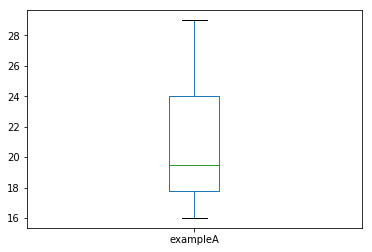

In [10]:
new_df["exampleA"].plot(kind='box')

#### Student: Create plots for examples B and C and check the quartiles

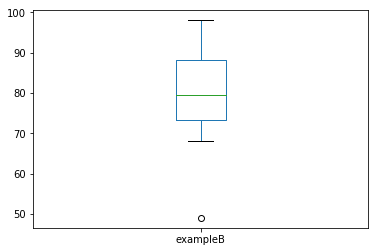

In [11]:
new_df["exampleB"].plot(kind = "box")

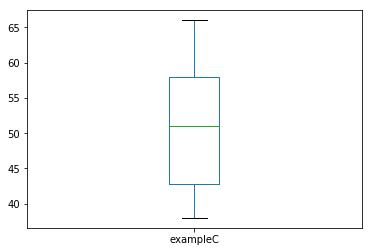

In [12]:
new_df["exampleC"].plot(kind="box")

#### What does the circle for example B represent?

Answer: The circle in example B represents an outlier.

### Part 3. Standard Deviation and Variance

**Variance:** The variance is how much the predictions for a given point vary between different realizations of the model.

**Standard Deviation:** The square root of the variance

<img(src='../../assets/images/biasVsVarianceImage.png', style="width: 30%; height: 30%")>

#### In Pandas
	Methods include: 
		.std() - Compute Standard Deviation
		.var() - Compute variance

#### Let's calculate variance by hand first. 
<img(src='../../assets/images/samplevarstd.png', style="width: 50%; height: 50%")>

In [13]:
#example1
mean = new_df["exampleA"].mean()
n= new_df["exampleA"].count()

print new_df["exampleA"]
print mean
print n


0    18
1    24
2    17
3    21
4    24
5    16
6    29
7    18
Name: exampleA, dtype: int64
20.875
8


In [14]:
#find the squared distance from the mean

obs0 = (18 - mean)**2
obs1 = (24 - mean)**2
obs2 = (17 - mean)**2
obs3 = (21 - mean)**2
obs4 = (24 - mean)**2
obs5 = (16 - mean)**2
obs6 = (29 - mean)**2
obs7 = (18 - mean)**2

print obs0, obs1, obs2, obs3, obs4, obs5, obs6, obs7

#sum each observation's squared distance from the mean 
numerator = (obs0 + obs1 + obs2 + obs3 + obs4 + obs5 + obs6 + obs7)
denominator = n - 1
variance = numerator/denominator
print numerator 
print denominator
print variance



8.265625 9.765625 15.015625 0.015625 9.765625 23.765625 66.015625 8.265625
140.875
7
20.125


In [54]:
print(new_df["exampleA"].mean())
    

20.875


In [65]:
#Function that can automatically calculate the variance of a dataframe provided the dataframe 
#is entered into the function.
def auto_var():
    new_list1 = []
    for d in new_df["exampleC"]:
        new_list1.append(d)
        
    new_n = new_df["exampleC"].count()
    new_mean = new_df["exampleC"].mean()
    new_list = []
    for i in new_list1:
        new_list.append((i - new_mean)**2)
    
    print((sum(new_list)/(new_n-1)))

auto_var()

116.125


In [45]:
# in pandas
a = new_df["exampleA"].var()
print("The variance for example A is " + str(a))

The variance for example A is 20.125


#### Students: Calculate the standard deviation by hand for each sample

Recall that the standard deviation is the square root of the variance. 

In [16]:
new_df.var()

exampleA     20.125000
exampleB    238.571429
exampleC    116.125000
dtype: float64

In [19]:
new_df.std()

exampleA     4.486090
exampleB    15.445758
exampleC    10.776131
dtype: float64

In [18]:
new_df.exampleA


0    18
1    24
2    17
3    21
4    24
5    16
6    29
7    18
Name: exampleA, dtype: int64

In [30]:
#Hand calculation of the standard deviation for example A versus the shorthand pandas function.
print((((18-20.875)**2) + ((24-20.875)**2) + ((17-20.875)**2)+((21-20.875)**2)+((24-20.875)**2)+((16-20.875)**2)+((29-20.875)**2)+((18-20.875)**2))/7)**(.5) 
print(new_df["exampleA"].std())

4.48608961123
4.48608961123


In [20]:
new_df.exampleB

0    75
1    87
2    49
3    68
4    75
5    84
6    98
7    92
Name: exampleB, dtype: int64

In [27]:
#Hand calculation of the standard deviation for example B versus the shorthand pandas function.
#Calculating mean of example B.
print("Mean of example B = " + str((75+87+49+68+75+84+98+92)/8))
print(((((75-78)**2)+((87-78)**2)+((49-78)**2)+((68-78)**2)+((75-78)**2)+((84-78)**2)+((98-78)**2)+((92-78)**2))/7)**(0.5))   
print(new_df["exampleB"].std())

Mean of example B = 78
15.4272486205
15.4457576237


In [28]:
new_df.exampleC

0    55
1    47
2    38
3    66
4    56
5    64
6    44
7    39
Name: exampleC, dtype: int64

In [32]:
#Hand calculation of the standard deviation for example C versus the shorthand pandas function.
#Calculating mean of example C.
print("Mean of example C = " + str((55+47+38+66+56+64+44+39)/8))
print( ((((55-51)**2)+((47-51)**2)+((38-51)**2)+((66-51)**2)+((56-51)**2)+((64-51)**2)+((44-51)**2)+((39-51)**2))/7)**(.5)  )
print(new_df["exampleC"].std())

Mean of example C = 51
10.7703296143
10.7761310311


In [33]:
new_df.describe()

,exampleA,exampleB,exampleC
count,8.00000,8.000000,8.000000
mean,20.87500,78.500000,51.125000
std,4.48609,15.445758,10.776131
min,16.00000,49.000000,38.000000
25%,17.75000,73.250000,42.750000
50%,19.50000,79.500000,51.000000
75%,24.00000,88.250000,58.000000
max,29.00000,98.000000,66.000000


#### Student: Check understanding 
Which value in the above table is the median? 

Answer: The median is the row in the table with the label (in bold), "50%."

### Part 4: Correlation

In [35]:
new_df.corr()

,exampleA,exampleB,exampleC
exampleA,1.000000,0.477283,-0.123745
exampleB,0.477283,1.000000,-0.057076
exampleC,-0.123745,-0.057076,1.000000
